# Exploring Commercial Permits Applications with Venues Nearby in Prince George's County, Maryland, US

Author: Peiyu Xu
<br> Date: Feb24, 2019

# Table of Contents
- Introduction
- Data and Methodology
- Pre-processing
- Visualization
- Foursquare API
- K-Means Clustering for venues
    <br>   K Means Model Evaluation
- Exploring Clusters
- Recommendation and Discussion
- Conclusion

## Introduction

In this project, the author will use dataset about residential and commercial permits (2012 to 2013) from Prince George's County and venue result obtained from FourSquare to explore where the permit applicant would be used, by clustering nearby existing venues into different groups.

Prince Geroge's County (PGC) is the second-most populous county in Maryland state, United States with 912,756 residences (2017), bordering the eastern porition od Washington D.C. It is one of the most richest African-American-majority counties in the U.S. People living in PGC are convenient to commute among nearby states/regions including Washington D.C, Virginia and West Virginia with metro, bus, train, or private vehicle. More information about PGC can be obtained by this link:
<br>https://www.princegeorgescountymd.gov/

Foursquare City Guide, commonly known as Foursquare, is a location provider and provides personalized recommendations on places (or venues) to visit. It can be accessed via its mobile application and official website. Users will be provided with the name of venue, type of business (e.g. restuarant, hotel), rating, comments, location, and a lot of other information. An individual customer can be exposed to wider and wiser choice of venues, and an investor can evaluate the business opportunities and risks with Foursquare data. See more information, use the link: https://foursquare.com/

## Data and Methodology

The list of data and source:
1. Residential and Commercial Permits (Jan 2012 through June 2013),updated on Sept 2015.
<br> link: https://data.princegeorgescountymd.gov/Urban-Planning/Residential-and-Commercial-Permits-Jan-2012-throug/dqvr-xqvv
2. Data from Foursquare obtained from search queries.</ol>
The first dataset will be explained in details.

The _Residential and Commercial Permits (Jan 2012 through June 2013)_ dataset documented the details of residential and commercial permits issued from January 2012 to June 2013. There are 18,202 observations and 12 columns. Lists of columns are shown below:

- **Permit Category** : The category of the permit                                
- **County Agency** : Name of the agency                                        
- **Permit Case ID** : Unique identifier of each case                     
- **Permit Case Year** :The year of when the permit issued                        -
- **Permit Case Type** : Type of the permit                                        
- **Permit Case Name** : Name of the permit                                       
- **Street Address** : street address only                                                      
- **City** : city name                                                 
- **Zip Code** : zip code of the location where the permit would be used   
- **Permit Issuance Date** : The date when the permit was issued.                      
- **Expected Construction Cost** : Expected Construction Cost                                
- **Location** : Full address with latitude and longitude          

In this project, K-means Clustering is employed. It is an unsupervised machine learning algorithm that groups observations within similar characteristics, and observations across different groups are very disimliar. It devides data into K non-overlapping groups. It has been widely used in customer segmentation, identifying crime-prone areas, loan collection calssification and so on. Model accuarcy can be evaluated with accuracy score, homegenity score, etc. In this project, evaluation will not be covered. If you are intersted in knowing more, please see the paragraph below.

Steps for K-Means Clustering
<br>
1. we specify the number of cluster, K
2. (the algorithm) randomly places K centroids, one for each cluster
3. (the algorithm) calcuates the distance of each point from each centroid using coordinates of each paired points
4. (the algorithm) assigns each data point to its closet centroid, and creates a cluster
5. (the algorithm) recalculate the position of the K centroids
6. Repeat 2~5 until the centriods no longer move.

## Pre-processing

In [1]:
#prepare libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [10]:
#load the permit data
permit_url="https://data.princegeorgescountymd.gov/api/views/dqvr-xqvv/rows.csv?accessType=DOWNLOAD"
permit=pd.read_csv(permit_url)
#head() function displays the first 5 observations of the dataframe
permit.head()

,Permit Category,County Agency,Permit Case ID,Permit Case Year,Permit Case Type,Permit Case Name,Street Address,City,Zip Code,Permit Issuance Date,Expected Construction Cost,Location
0,Building Permit,DER,2595307,2012,S (SIGN),R & N SIGNS,7509 OLD BRANCH,CLINTON,20735,September 14 2012,25.0,"7509 OLD BRANCH\nCLINTON, MD 20735"
1,Building Permit,DER,2631055,2013,S (SIGN),CLINTON SIGN,7810 OLD BRANCH,CLINTON,20735,June 14 2013,1100.0,"7810 OLD BRANCH\nCLINTON, MD 20735"
2,Building Permit,DER,2631055,2013,S (SIGN),CLINTON SIGN,7810 OLD BRANCH,CLINTON,20735,June 14 2013,1100.0,"7810 OLD BRANCH\nCLINTON, MD 20735"
3,Building Permit,DER,2631056,2013,S (SIGN),CLINTON SIGN,7810 OLD BRANCH,CLINTON,20735,June 14 2013,1100.0,"7810 OLD BRANCH\nCLINTON, MD 20735"
4,Building Permit,DER,2595308,2012,S (SIGN),R & N SIGNS,7509 OLD BRANCH,CLINTON,20735,September 14 2012,25.0,"7509 OLD BRANCH\nCLINTON, MD 20735"


In [274]:
#the number of rows and columns of the permit data
print('The permit data has {} rows and {} columns'. format(permit.shape[0],permit.shape[1]))

The permit data has 18202 rows and 12 columns


In [275]:
#list the column names and column type
permit.dtypes

Permit Category                object
County Agency                  object
Permit Case ID                  int64
Permit Case Year                int64
Permit Case Type               object
Permit Case Name               object
Street Address                 object
City                           object
Zip Code                        int64
Permit Issuance Date           object
Expected Construction Cost    float64
Location                       object
dtype: object

Column value types are not correct. _Permit Case ID_ is an unique identifier, so it should be treated as _object_, otherwise it might affect plotting and summary statistics. Besides,type of  _Permit Case Year_ should be _object_, _Zip Code_ should be _object_. Also, column names are not convenient for future processing. Blanks in the column names should be avoided.

In [11]:
#rename columns
permit.rename(columns={"Permit Category":"Permit_Category","County Agency":"County_Agency","Permit Case ID":"Permit_Case_ID", "Permit Case Year":"Permit_Case_Year", "Permit Case Type":"Permit_Case_Type","Permit Case Name":"Permit_Case_Name","Street Address":"Street_Address","Zip Code":"Zip_Code","Permit Issuance Date":"Permit_Issuance_Date","Expected Construction Cost":"Expected_Construction_Cost"},inplace=True)

In [12]:
#change data types
permit.Permit_Case_ID=permit.Permit_Case_ID.astype(object)
permit.Permit_Case_Year=permit.Permit_Case_Year.astype(object)
permit.Zip_Code=permit.Zip_Code.astype(object)

In [13]:
permit.dtypes

Permit_Category                object
County_Agency                  object
Permit_Case_ID                 object
Permit_Case_Year               object
Permit_Case_Type               object
Permit_Case_Name               object
Street_Address                 object
City                           object
Zip_Code                       object
Permit_Issuance_Date           object
Expected_Construction_Cost    float64
Location                       object
dtype: object

In [14]:
#get the summary statistics of permit data
#only numeric columns have mean, standard deviation, min, max and quantiles
permit.describe(include='all')

,Permit_Category,County_Agency,Permit_Case_ID,Permit_Case_Year,Permit_Case_Type,Permit_Case_Name,Street_Address,City,Zip_Code,Permit_Issuance_Date,Expected_Construction_Cost,Location
count,18202,18202,18202.0,18202.0,18202,18202,18192,18180,18202.0,18202,1.820200e+04,18202
unique,3,3,18171.0,11.0,57,11188,9776,145,43.0,469,NaN,10142
top,Building Permit,DER,2601795.0,2012.0,MEC (MECHANICAL),DOMAIN COLLEGE PARK MECHANICAL,3711 CAMPUS,UPPER MARLBORO,20772.0,November 26 2012,NaN,"3711 CAMPUS\nCOLLEGE PARK, MD 20740\n(38.98470..."
freq,11857,11868,2.0,12092.0,5475,259,266,1838,1133.0,293,NaN,262
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.311342e+03,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.069225e+04,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000e+03,NaN


Noting that the permit data has 18202 rows, but some of the columns have less than 18202 non-missing rows. They are **Street_Address**(18192) and **City**(18180). 

In [15]:
#get the number of missing values for each column
pd.isnull(permit).sum()

Permit_Category                0
County_Agency                  0
Permit_Case_ID                 0
Permit_Case_Year               0
Permit_Case_Type               0
Permit_Case_Name               0
Street_Address                10
City                          22
Zip_Code                       0
Permit_Issuance_Date           0
Expected_Construction_Cost     0
Location                       0
dtype: int64

In [16]:
#drop observations that have missing value
permit=permit.dropna()
print('The cleaned permit data has {} rows and {} columns'. format(permit.shape[0],permit.shape[1]))

The cleaned permit data has 18170 rows and 12 columns


In [17]:
#City has typos, mixed cases and trailing blanks
#convert values into uppercase
permit['City'] = permit['City'].apply(lambda x: x.upper())
#remove trailing blanks
permit['City']=permit['City'].str.strip()
#recode wrongly-entered city names
permit.loc[permit["City"] == "8912","City"] = np.nan
permit.loc[permit["City"] == "ACCOKKEK","City"] = "ACCOKEEK"
permit.loc[permit["City"] == "BLADENSSBURG","City"] = "BLADENSBURG"
permit.loc[permit["City"] == "BRANYWINE","City"] = "BRANDYWINE"
permit.loc[permit["City"] == "CAMPS SPRINGS","City"] = "CAMP SPRINGS"
permit.loc[permit["City"] == "CAPITAL HEIGHTS","City"] = "CAPITOL HEIGHTS"
permit.loc[permit["City"] == "COLLEG PARK","City"] = "COLLEGE PARK"
permit.loc[permit["City"] == "DISTRICT HTS","City"] = "DISTRICT HEIGHTS"
permit.loc[permit["City"] == "EDMONDSTON","City"] = "EDMONSTON"
permit.loc[permit["City"] == "FORESVILLE","City"] = "FORESTVILLE"
permit.loc[permit["City"] == "FORESSTVILLE","City"] = "FORESTVILLE"
permit.loc[permit["City"] == "GLEN DALE","City"] = "GLENN DALE"
permit.loc[permit["City"] == "HYATTVILLE","City"] = "HYATTSVILLE"
permit.loc[permit["City"] == "LANAHM","City"] = "LANHAM"
permit.loc[permit["City"] == "LAHNHAM","City"] = "LANHAM"
permit.loc[permit["City"] == "LANDOVER HILL","City"] = "LANDOVER HILLS"
permit.loc[permit["City"] == "MOUNT RANIER","City"] = "MOUNT RAINIER"
permit.loc[permit["City"] == "NATIIONAL HARBOR","City"] = "NATIONAL HARBOR"
permit.loc[permit["City"] == "NATIONAL HABOR","City"] = "NATIONAL HARBOR"
permit.loc[permit["City"] == "NATIONAL HARBOB","City"] = "NATIONAL HARBOR"
permit.loc[permit["City"] == "NATIONAL HARBORO","City"] = "NATIONAL HARBOR"
permit.loc[permit["City"] == "NATIONLA HARBOR","City"] = "NATIONAL HARBOR"
permit.loc[permit["City"] == "NEW CARROLTON","City"] = "NEW CARROLLTON"
permit.loc[permit["City"] == "OXON HHILL","City"] = "OXON HILLS"
permit.loc[permit["City"] == "OXON HILL","City"] = "OXON HILLS"
permit.loc[permit["City"] == "OXON HILLL","City"] = "OXON HILLS"
permit.loc[permit["City"] == "OXONH HILL","City"] = "OXON HILLS"
permit.loc[permit["City"] == "PLEASE ENTER ZIP CODE","City"] = np.nan
permit.loc[permit["City"] == "RIVERDALE","City"] = "RIVERDALE PARK"
permit.loc[permit["City"] == "RIVERDALEPARK","City"] = "RIVERDALE PARK"
permit.loc[permit["City"] == "SEAT PLEASENT","City"] = "SEAT PLEASANT"
permit.loc[permit["City"] == "SEAT PLEASNT","City"] = "SEAT PLEASANT"
permit.loc[permit["City"] == "SEAT PLESANT","City"] = "SEAT PLEASANT"
permit.loc[permit["City"] == "SPRINGDDALE","City"] = "SPRINGDALE"
permit.loc[permit["City"] == "UNIVERISTY PARK","City"] = "UNIVERSITY PARK"
permit.loc[permit["City"] == "UPPER  MARLBORO","City"] = "UPPER MARLBORO"
permit.loc[permit["City"] == "UPPERMARLBORO","City"] = "UPPER MARLBORO"

In [18]:
#extract year, month, and date from Permit_Issuance_Date and save them into two new columns called Month, and Date (we already had "Permit_Case_Year")
date_df = permit['Permit_Issuance_Date'].str.split(expand=True).reindex(columns=np.arange(3)).add_prefix('date')
date_df.drop(['date2'],axis=1,inplace=True)
date_df.rename(columns={'date0':'Month',"date1":"Date"},inplace=True)

In [19]:
#extract latitude and longtitude from Location and save it into two new columns called Lat and Long
geo_df=permit['Location'].apply(lambda x: x.replace('\n',',').replace('(',' ').replace(')',' ')).str.split(expand=True,pat=',').reindex(columns=np.arange(5)).add_prefix('geo')
geo_df.drop(geo_df[['geo0','geo1','geo2']],axis=1,inplace=True)
geo_df.rename(columns={'geo3':'Lat','geo4':'Long'},inplace=True)
geo_df.tail()

,Lat,Long
18197,38.804014,-76.990247
18198,38.907787,-76.866551
18199,38.943084,-76.902075
18200,38.866796,-76.923302
18201,38.847668,-76.869614


In [20]:
#exclude the latitude and longtitude from the Location column
add_df=permit['Location'].apply(lambda x: x.replace('\n',',')).str.split(expand=True,pat=',').add_prefix('add')
add_df['add0']=add_df['add0']+','
add_df['add1']=add_df['add1']+','
add_df['add2']=add_df['add2'].replace({'MD':'MD,'},regex=True)
add_df=add_df['add0']+' '+add_df['add1']+''+add_df['add2']
add_df.tail()

18197        6201 LIVINGSTON, OXON HILL, MD, 20745
18198              1600 FEDEX, LANDOVER, MD, 20785
18199    6741 ANNAPOLIS, NEW CARROLLTON, MD, 20784
18200     1615 PACIFIC, CAPITOL HEIGHTS, MD, 20743
18201     7911 CRYDEN, DISTRICT HEIGHTS, MD, 20747
dtype: object

In [21]:
#check how many observations don't have latititude and longtitude information
pd.isnull(geo_df).sum()

Lat     3652
Long    3652
dtype: int64

In [22]:
pd.isnull(add_df).sum()

0

In [23]:
permit=pd.concat([permit, date_df, geo_df, add_df], axis=1)
permit = pd.DataFrame(data=permit)
permit.drop(permit[['Location']],axis=1,inplace=True)
permit.rename(columns={0:'Address'},inplace=True)
permit.head()

,Permit_Category,County_Agency,Permit_Case_ID,Permit_Case_Year,Permit_Case_Type,Permit_Case_Name,Street_Address,City,Zip_Code,Permit_Issuance_Date,Expected_Construction_Cost,Month,Date,Lat,Long,Address
0,Building Permit,DER,2595307,2012,S (SIGN),R & N SIGNS,7509 OLD BRANCH,CLINTON,20735,September 14 2012,25.0,September,14,None,None,"7509 OLD BRANCH, CLINTON, MD, 20735"
1,Building Permit,DER,2631055,2013,S (SIGN),CLINTON SIGN,7810 OLD BRANCH,CLINTON,20735,June 14 2013,1100.0,June,14,None,None,"7810 OLD BRANCH, CLINTON, MD, 20735"
2,Building Permit,DER,2631055,2013,S (SIGN),CLINTON SIGN,7810 OLD BRANCH,CLINTON,20735,June 14 2013,1100.0,June,14,None,None,"7810 OLD BRANCH, CLINTON, MD, 20735"
3,Building Permit,DER,2631056,2013,S (SIGN),CLINTON SIGN,7810 OLD BRANCH,CLINTON,20735,June 14 2013,1100.0,June,14,None,None,"7810 OLD BRANCH, CLINTON, MD, 20735"
4,Building Permit,DER,2595308,2012,S (SIGN),R & N SIGNS,7509 OLD BRANCH,CLINTON,20735,September 14 2012,25.0,September,14,None,None,"7509 OLD BRANCH, CLINTON, MD, 20735"


## Visualization

I will visualize: <br>
1. the number of unique Permit_Case_Type for each Permit_Category with bar chart
2. the number of permits issued per year with bar chart
3. the number of permits issued per month by year with stacked with bar chart
4. top 6 cities of average expected construction cost with bar chart
4. location of permit to be used grouped by Permit_Category with map using 200 samples

In [24]:
#data types of processed dataset
permit.dtypes

Permit_Category                object
County_Agency                  object
Permit_Case_ID                 object
Permit_Case_Year               object
Permit_Case_Type               object
Permit_Case_Name               object
Street_Address                 object
City                           object
Zip_Code                       object
Permit_Issuance_Date           object
Expected_Construction_Cost    float64
Month                          object
Date                           object
Lat                            object
Long                           object
Address                        object
dtype: object

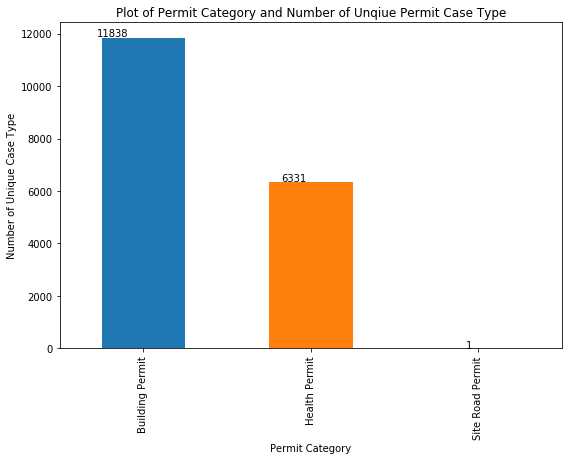

In [25]:
#permit category bar chart
#create a group
cate=permit[['Permit_Category','Permit_Case_Type']]
#grouping results of unique number of Permit_Case_Type
cate=cate.groupby(['Permit_Category'],as_index=True)['Permit_Case_Type'].count()
cate
colors='lightcoral','darkslateblue', 'mediumseagreen'
ax0=cate.plot(kind='bar', figsize=(9,6))
ax0.set_title('Plot of Permit Category and Number of Unqiue Permit Case Type')
ax0.set_ylabel('Number of Unique Case Type')
ax0.set_xlabel('Permit Category')
for p in ax0.patches:
    ax0.annotate(str(p.get_height()), (p.get_x() * 1.1, p.get_height() * 1.005))
plt.show()

Building Permit is the most popular one.

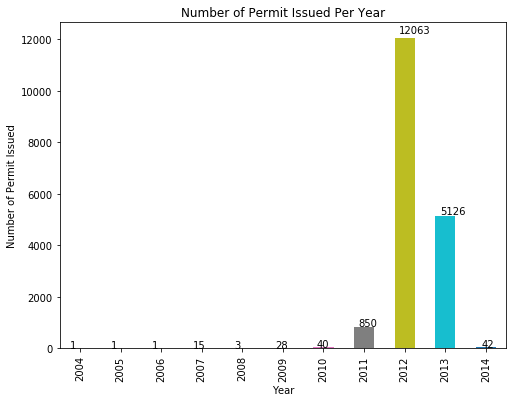

In [26]:
year=permit[['Permit_Case_Year','Permit_Category']]
year=year.groupby(['Permit_Case_Year'])['Permit_Category'].count()
year
ax1=year.plot(kind='bar',figsize=(8,6))
ax1.set_title('Number of Permit Issued Per Year')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Permit Issued')
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.015))
plt.show()

Recall the release date Jan 2012 through June 2013, but the data has been updated on Sept 2015. So in 2012, the county issued the greatest number of permits.

Text(0.5, 0, 'Month')

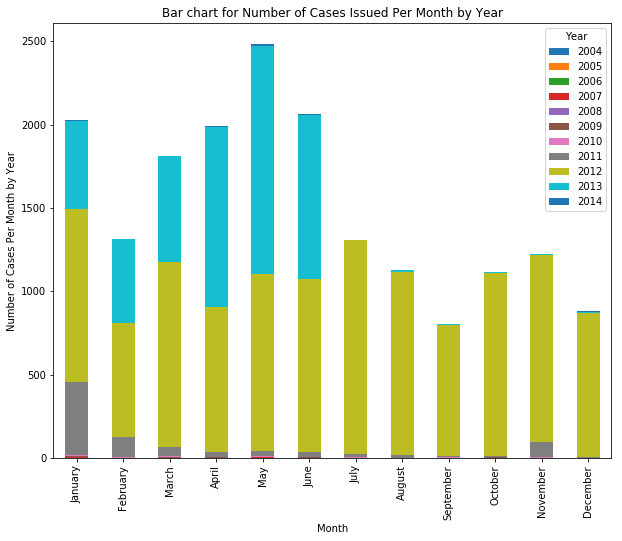

In [111]:
#plot for Month
#see which month has
#line chart-time series
monthdf=permit[['Month','Permit_Case_Year','Permit_Case_ID']]
monthdf=monthdf.groupby(['Permit_Case_Year','Month'])['Permit_Case_ID'].count()
monthdf=monthdf.reset_index()
monthdf.columns=['Year','Month','Number of Cases']
monthdf=pd.DataFrame(monthdf)
monthdf_pivot=monthdf.pivot(index='Year',columns='Month',values='Number of Cases')
monthdf_pivot_t=monthdf_pivot.transpose()
monthdf_pivot_t.index = pd.CategoricalIndex(monthdf_pivot_t.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'])
monthdf_pivot_t = monthdf_pivot_t.sort_index()
ax2=monthdf_pivot_t.plot(kind='bar',figsize=(10,8),label='Year',stacked=True)
ax2.set_title ('Bar chart for Number of Cases Issued Per Month by Year')
ax2.set_ylabel('Number of Cases Per Month by Year')
ax2.set_xlabel('Month')

Special pattern like seasonality is not observed from the above bar chart. The number of permits issued each month is nearly even.

In [27]:
#Expected Construction Cost
#make a pivot table to calculate the average expected construction cost of each city
citydf=permit[['City','Expected_Construction_Cost']]
citydf=citydf.groupby(['City'])['Expected_Construction_Cost'].aggregate('mean')
citydf=citydf.reset_index()
citydf.columns=['City','Average Expected Construction Cost']
citydf=citydf.sort_values(by=['Average Expected Construction Cost'], ascending=False)
#display the top 6 cities of average construction cost
topcity=pd.DataFrame(citydf.head(6)).set_index('City')
topcity['Average Expected Construction Cost']=topcity['Average Expected Construction Cost'].round(2)
topcity

,Average Expected Construction Cost
City,
SILVER SPRING,59781.34
MITCHELLVILLE,21773.75
EMERALD,21000.00
BERWYN HEIGHTS,18676.83
WALDORF,18196.33
CHELTENHAM,14805.12


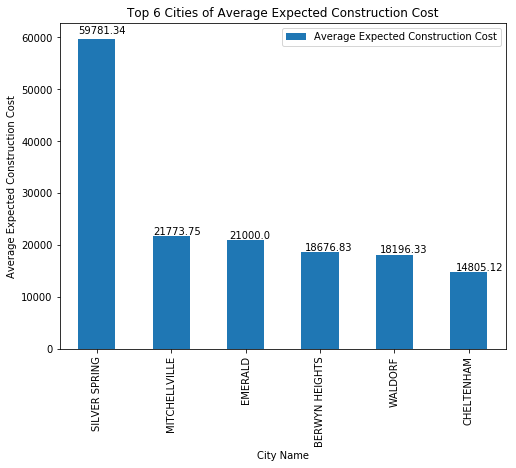

In [28]:
#bar plot for top 6 cities
ax2=topcity.plot(kind='bar',figsize=(8,6))
ax2.set_title('Top 6 Cities of Average Expected Construction Cost')
ax2.set_xlabel('City Name')
ax2.set_ylabel('Average Expected Construction Cost')
for p in ax2.patches:
    ax2.annotate(str(p.get_height()), (p.get_x() * 1.015, p.get_height() * 1.015))
plt.show()

The city Silver Spring ranks the first. Its average expected construction cost was twice as much as the cost of Mitchellville.

In [29]:
#map for location
import folium
print('Folium imported!')

Folium imported!


For better display on browser, I will draw a random sample of 200 pairs of latitude and longititude.

In [34]:
#create a subset of permit data with vaild Latitude and Longtitude values
map_df=permit.dropna().sample(n=200)
#change data type of Lat and Long from object to float
map_df.Lat=map_df.Lat.astype(float)
map_df.Long=map_df.Long.astype(float)
map_df.shape

(200, 16)

In [31]:
#import folium for maps
from folium.plugins import MarkerCluster
print('import finished')

import finished


In [36]:
casemap= folium.Map(location=[38.804014, -76.990247], zoom_start=11) # set default location on the map
mc=MarkerCluster()
# add the location to the marker cluster
locationlist=map_df[['Lat','Long']].values.tolist()
labels=map_df['Permit_Category'].values.tolist()

for row in map_df.itertuples():
    mc.add_child(folium.Marker(location=[row.Lat,row.Long],popup=row.Permit_Category))

casemap.add_child(mc)
casemap

<br>

### FourSquare API

In [119]:
!pip install geopy

  Running setup.py bdist_wheel for geographiclib: started
  Running setup.py bdist_wheel for geographiclib: finished with status 'done'
  Stored in directory: C:\Users\peiyu\AppData\Local\pip\Cache\wheels\99\45\d1\14954797e2a976083182c2e7da9b4e924509e59b6e5c661061
Successfully built geographiclib


In [13]:
#import necessary libraries
import requests
from geopy.geocoders import Nominatim
from IPython.display import Image 
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
print('Libraries imported.')

Libraries imported.


In [37]:
#setting up FourSquare Credentials
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20150830'
LIMIT = 30

FourSquare has many useful search functions. We can search for a user's profile, the location and rating of a specific venue, and explore venues nearby a given location.<br>
<br>Venues are tagged as resturant, shopping, hotel, ect.<br><br>In this project, I will explore the venues around a given location from the permit data.
<br><br>First start with a quick example.

In [15]:
latitude=38.804014
longitude=-76.990247
radius=100 #search radius, measured in meter

In [17]:
#get results
results = requests.get(url).json()
'There are {} venues around given location.'.format(len(results['response']['groups'][0]['items']))

'There are 4 venues around given location.'

In [20]:
#define functions for future processing

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
#get relevant part of JSON
items = results['response']['groups'][0]['items']
items[0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4c9d24f00e9bb1f7cb6cda5f',
  'name': "Eddie's Carry Out",
  'location': {'address': '6255 Livingston Rd',
   'crossStreet': 'at Oxon Hill Rd',
   'lat': 38.8046421060136,
   'lng': -76.99078723550305,
   'labeledLatLngs': [{'label': 'display',
     'lat': 38.8046421060136,
     'lng': -76.99078723550305}],
   'distance': 84,
   'postalCode': '20745',
   'cc': 'US',
   'city': 'Oxon Hill',
   'state': 'MD',
   'country': 'United States',
   'formattedAddress': ['6255 Livingston Rd (at Oxon Hill Rd)',
    'Oxon Hill, MD 20745',
    'United States']},
  'categories': [{'id': '4bf58dd8d48988d145941735',
    'name': 'Chinese Restaurant',
    'pluralName': 'Chinese Restaurants',
    'shortName': 'Chinese',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/asian_',
     'suffix': '.png'},
    'primary': True}],
  'p

In [22]:
#Process JSON and convert it to a clean dataframe
dataframe = json_normalize(items) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean columns
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head(10)

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Eddie's Carry Out,Chinese Restaurant,6255 Livingston Rd,US,Oxon Hill,United States,at Oxon Hill Rd,84,"[6255 Livingston Rd (at Oxon Hill Rd), Oxon Hi...","[{'label': 'display', 'lat': 38.8046421060136,...",38.804642,-76.990787,20745,MD,4c9d24f00e9bb1f7cb6cda5f
1,Jerry Chan's Restaurant & Carryout,Restaurant,6210 Livingston Rd,US,Oxon Hill,United States,NaN,17,"[6210 Livingston Rd, Oxon Hill, MD 20745, Unit...","[{'label': 'display', 'lat': 38.8041615486145,...",38.804162,-76.990324,20745,MD,4cdb4309c409b60c43eed31a
2,24 hrs laundromat,Laundromat,NaN,US,Oxon Hill,United States,NaN,35,"[Oxon Hill, MD 20745, United States]","[{'label': 'display', 'lat': 38.80422363674918...",38.804224,-76.990557,20745,MD,4f287461e4b0600378e42a33
3,Taco Bell,Fast Food Restaurant,6315 Oxon Hill Rd,US,Oxon Hill,United States,NaN,79,"[6315 Oxon Hill Rd, Oxon Hill, MD 20745, Unite...","[{'label': 'display', 'lat': 38.80352061044522...",38.803521,-76.990903,20745,MD,4b9bfa12f964a520ab3c36e3


For speed and purpose, I extract 100 observations as a sample.

In [145]:
#try 100 data points as sample
subset=permit[['Lat','Long']].dropna().sample(n=100)

In [146]:
subset.columns

Index(['Lat', 'Long'], dtype='object')

In [147]:
subset.head()

,Lat,Long
12371,38.665600,-76.885293
4546,38.837265,-76.940447
9252,38.856928,-76.864706
6060,38.750250,-76.874997
9203,38.981306,-76.934041


In [175]:
#a function for scrapping Foursquare result and append results in one dataframe
def foursquare_crawler (lat_list, lng_list, LIMIT = 200, radius = 200):
    result_ds = []
    counter = 0
    for lat, lng in zip( lat_list, lng_list):
         
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, CLIENT_SECRET, VERSION, 
            lat, lng, radius, LIMIT)
            
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        tmp_dict = {}
        tmp_dict['Latitude'] = lat; tmp_dict['Longitude'] = lng;
        tmp_dict['Crawling_result'] = results;
        result_ds.append(tmp_dict)
        counter += 1
        print('{}.'.format(counter))
        print('Data is Obtained, for the latitude {} (and longitude {}) SUCCESSFULLY.'.format(lat, lng))
    return result_ds;

In [176]:
permit_explore_df=foursquare_crawler(list(subset['Lat']),list(subset['Long']),)

1.
Data is Obtained, for the latitude 38.6656 (and longitude -76.885293) SUCCESSFULLY.
2.
Data is Obtained, for the latitude 38.837265 (and longitude -76.94044699999999) SUCCESSFULLY.
3.
Data is Obtained, for the latitude 38.856928 (and longitude -76.86470600000001) SUCCESSFULLY.
4.
Data is Obtained, for the latitude 38.75025 (and longitude -76.874997) SUCCESSFULLY.
5.
Data is Obtained, for the latitude 38.981306 (and longitude -76.93404100000001) SUCCESSFULLY.
6.
Data is Obtained, for the latitude 38.95671 (and longitude -76.87104699999999) SUCCESSFULLY.
7.
Data is Obtained, for the latitude 38.955616 (and longitude -76.939145) SUCCESSFULLY.
8.
Data is Obtained, for the latitude 38.984701 (and longitude -76.949968) SUCCESSFULLY.
9.
Data is Obtained, for the latitude 38.744265000000006 (and longitude -76.992317) SUCCESSFULLY.
10.
Data is Obtained, for the latitude 38.856683000000004 (and longitude -76.883363) SUCCESSFULLY.
11.
Data is Obtained, for the latitude 38.955723 (and longitude

89.
Data is Obtained, for the latitude 38.873284999999996 (and longitude -76.929967) SUCCESSFULLY.
90.
Data is Obtained, for the latitude 38.697293 (and longitude -76.948518) SUCCESSFULLY.


ConnectionError: HTTPSConnectionPool(host='api.foursquare.com', port=443): Max retries exceeded with url: /v2/venues/explore?&client_id=YAL1VBX231OOXFKOUVOQYB2YUW45ENGW3CADDDW1QZDDALKW&client_secret=0J2KKHT3ABOUSEK0UJJOP4PQ4SSNG30R5AX41XJHTKC54O1T&v=20190220&ll=38.974610999999996,-76.958908&radius=200&limit=200 (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000001A50D010BE0>: Failed to establish a new connection: [WinError 10013] An attempt was made to access a socket in a way forbidden by its access permissions'))

In [177]:
import pickle
with open("permit_explore_df.txt", "wb") as fp:   #Pickling
    pickle.dump(permit_explore_df, fp)
print('Received Data from Internet is Saved to Computer.')

Received Data from Internet is Saved to Computer.


In [178]:
with open("permit_explore_df.txt", "rb") as fp:   # Unpickling
    permit_explore_df = pickle.load(fp)

In [185]:
# This function is created to connect to the saved list which is the received database. It will extract each venue 
# for every neighborhood inside the database

def get_venue_dataset(foursquare_dataset):
    result_df = pd.DataFrame(columns = ['Latitude', 'Longitude',
                                          'Venue', 'Venue Summary', 'Venue Category', 'Distance'])
    
    for neigh_dict in foursquare_dataset:
        lat = neigh_dict['Latitude']; lng = neigh_dict['Longitude']
        print('Number of Venuse in latitude {} and longitude {}  is:'.format(lat, lng))
        print(len(neigh_dict['Crawling_result']))
        
        for venue_dict in neigh_dict['Crawling_result']:
            summary = venue_dict['reasons']['items'][0]['summary']
            name = venue_dict['venue']['name']
            dist = venue_dict['venue']['location']['distance']
            cat =  venue_dict['venue']['categories'][0]['name']
            

            
            result_df = result_df.append({'Latitude': lat, 'Longitude':lng,
                              'Venue': name, 'Venue Summary': summary, 
                              'Venue Category': cat, 'Distance': dist}, ignore_index = True)
            # print(result_df)
    
    return(result_df)

In [186]:
permit_venues = get_venue_dataset(permit_explore_df)

Number of Venuse in latitude 38.6656 and longitude -76.885293  is:
0
Number of Venuse in latitude 38.837265 and longitude -76.94044699999999  is:
2
Number of Venuse in latitude 38.856928 and longitude -76.86470600000001  is:
0
Number of Venuse in latitude 38.75025 and longitude -76.874997  is:
0
Number of Venuse in latitude 38.981306 and longitude -76.93404100000001  is:
0
Number of Venuse in latitude 38.95671 and longitude -76.87104699999999  is:
18
Number of Venuse in latitude 38.955616 and longitude -76.939145  is:
13
Number of Venuse in latitude 38.984701 and longitude -76.949968  is:
4
Number of Venuse in latitude 38.744265000000006 and longitude -76.992317  is:
8
Number of Venuse in latitude 38.856683000000004 and longitude -76.883363  is:
0
Number of Venuse in latitude 38.955723 and longitude -76.939136  is:
13
Number of Venuse in latitude 39.078103999999996 and longitude -76.86628499999999  is:
6
Number of Venuse in latitude 39.002784000000005 and longitude -76.965746  is:
0
Nu

### Display the dataframe from FourSquare

In [187]:
#the first five observations
permit_venues.head()

,Latitude,Longitude,Venue,Venue Summary,Venue Category,Distance
0,38.837265,-76.940447,U-Haul of Marlow Heights,This spot is popular,Storage Facility,133
1,38.837265,-76.940447,New York Fried Chicken,This spot is popular,American Restaurant,150
2,38.956710,-76.871047,Chipotle Mexican Grill,This spot is popular,Mexican Restaurant,149
3,38.956710,-76.871047,Mid-Atlantic Seafood and Soul Food,This spot is popular,Southern / Soul Food Restaurant,55
4,38.956710,-76.871047,Starbucks,This spot is popular,Coffee Shop,173


In [188]:
#the last five observations
permit_venues.tail()

,Latitude,Longitude,Venue,Venue Summary,Venue Category,Distance
468,39.08237,-76.863557,Papa John's Pizza,This spot is popular,Pizza Place,100
469,39.08237,-76.863557,Pizza Hut,This spot is popular,Pizza Place,58
470,39.08237,-76.863557,Asahi Japanese Restaurant,This spot is popular,Sushi Restaurant,45
471,39.08237,-76.863557,Valvoline Instant Oil Change,This spot is popular,Auto Garage,73
472,39.08237,-76.863557,Kingsway African Restaurant,This spot is popular,African Restaurant,107


In [189]:
#the number of rows and columns of the permit_venues data
print('The permit venue data has {} rows and {} columns'. format(permit_venues.shape[0],permit_venues.shape[1]))

The permit venue data has 473 rows and 6 columns


In [190]:
list(permit_venues['Venue Category'].unique())

['Storage Facility',
 'American Restaurant',
 'Mexican Restaurant',
 'Southern / Soul Food Restaurant',
 'Coffee Shop',
 'Sandwich Place',
 'Wings Joint',
 'South American Restaurant',
 'Grocery Store',
 'Fast Food Restaurant',
 'Mobile Phone Shop',
 'Bank',
 'Pizza Place',
 'Ice Cream Shop',
 'Pharmacy',
 'Convenience Store',
 'Furniture / Home Store',
 'Seafood Restaurant',
 'Indian Restaurant',
 'Bookstore',
 'Historic Site',
 'Café',
 'Thai Restaurant',
 'Burger Joint',
 'Cupcake Shop',
 'Eye Doctor',
 'Cosmetics Shop',
 'Bubble Tea Shop',
 'Frozen Yogurt Shop',
 'Diner',
 'Supplement Shop',
 'Rental Car Location',
 'Gas Station',
 'Chinese Restaurant',
 'Shopping Mall',
 'Shop & Service',
 'Pet Store',
 'Hotel',
 'Asian Restaurant',
 'Nightlife Spot',
 'Latin American Restaurant',
 'Clothing Store',
 'Mattress Store',
 'Business Service',
 'Restaurant',
 'Motorcycle Shop',
 'Kids Store',
 'Food',
 'Gym / Fitness Center',
 'Discount Store',
 'Spa',
 'Pawn Shop',
 'Video Game Store'

## K-Means Clustering for Permit_Venues

In [191]:
#pre-process for the permit_venues dataframe
#dummy coding for Venue Category variable
venues_dummy=pd.get_dummies(data=permit_venues, prefix="",prefix_sep="", columns=['Venue Category'])
venues_dummy.head()

,Latitude,Longitude,Venue,Venue Summary,Distance,ATM,Accessories Store,African Restaurant,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Big Box Store,Bistro,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Business Service,Café,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Credit Union,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doctor's Office,Donut Shop,Electronics Store,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gourmet Shop,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,High School,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Lebanese Restaurant,Liquor Store,Market,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Moving Target,Music Store,Nightclub,Nightlife Spot,Opera House,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Print Shop,Pub,Rental Car Location,Restaurant,Salvadoran Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supplement Shop,Sushi Restaurant,Tailor Shop,Tea Room,Thai Restaurant,Theme Park Ride / Attraction,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,38.837265,-76.940447,U-Haul of Marlow Heights,This spot is popular,133,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,38.837265,-76.940447,New York Fried Chicken,This spot is popular,150,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38.956710,-76.871047,Chipotle Mexican Grill,This spot is popular,149,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,38.956710,-76.871047,Mid-Atlantic Seafood and Soul Food,This spot is popular,55,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,38.956710,-76.871047,Starbucks,This spot is popular,173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [195]:
permit_venues.to_csv('permit_venues.csv',index=False)
venues_dummy.to_csv('venues_dummy.csv',index=False)

In [192]:
#the number of rows and columns of the venues_dummy data
print('The venue dummy data has {} rows and {} columns'. format(venues_dummy.shape[0],venues_dummy.shape[1]))

The venue dummy data has 473 rows and 145 columns


In [84]:
#import packages
#import kmeans model
from sklearn.cluster import KMeans
#import evaluation metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

In [85]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)

- init: initialization method of the centroids
<br>k-means++: selects initial cluster centers for k-means clustering in a smart way to speed up convergence.
- n_clusters: the number of clusters to form as well as the number of centroids to generate.
- n_init: the number of times the k-means algorithm will be run with different centroid seeds.

In [200]:
#fit model
#create a subset, drop columns
col_to_drop=['Latitude','Longitude','Venue','Venue Summary']
feature=venues_dummy.drop(col_to_drop,axis=1)
#fit model
k_means.fit(feature)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [210]:
#get cluster label for each observation in feature set and save it into the venue_dummy dataframe
venues_dummy['labels']=k_means.labels_
k_means_labels = k_means.labels_

In [204]:
k_means_labels

array([2, 2, 2, 0, 1, 0, 1, 2, 1, 0, 1, 1, 2, 0, 1, 2, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 2, 1, 2, 2,
       0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 0,
       2, 1, 2, 0, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 2, 1,
       1, 2, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 1,
       1, 0, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 0, 2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1,
       2, 1, 2, 0, 2, 2, 1, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 1, 2, 2, 1, 0,
       0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 2, 0, 1, 0,
       0, 0, 1, 1, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 1, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 2, 1, 0, 0,

In [206]:
#the coordinates of the cluster centers
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 5.85274725e+01, -6.93889390e-18,  5.49450549e-03,
        -6.93889390e-18,  2.74725275e-02, -6.93889390e-18,
         5.49450549e-03, -6.93889390e-18,  1.09890110e-02,
         5.49450549e-03, -6.93889390e-18,  5.49450549e-03,
         5.49450549e-03,  5.49450549e-03,  5.49450549e-03,
        -2.77555756e-17,  5.49450549e-03, -6.93889390e-18,
        -6.93889390e-18, -6.93889390e-18,  5.49450549e-03,
        -6.93889390e-18,  1.09890110e-02,  1.09890110e-02,
        -6.93889390e-18,  1.64835165e-02, -6.93889390e-18,
         5.49450549e-03,  1.09890110e-02,  3.29670330e-02,
        -6.93889390e-18,  5.49450549e-03,  5.49450549e-03,
         2.19780220e-02,  1.09890110e-02, -6.93889390e-18,
         5.20417043e-18, -6.93889390e-18,  5.49450549e-03,
         1.09890110e-02,  5.49450549e-03,  3.29670330e-02,
         5.49450549e-03,  2.74725275e-02,  5.49450549e-03,
         5.49450549e-03,  5.20417043e-18,  5.49450549e-03,
         3.84615385e-02,  5.49450549e-03,  1.09890110e-0

In [211]:
#check the centroid values
venues_dummy.groupby('labels').mean()

,Latitude,Longitude,ATM,Accessories Store,African Restaurant,American Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Garage,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Big Box Store,Bistro,Bookstore,Breakfast Spot,Bubble Tea Shop,Burger Joint,Business Service,Café,Campground,Candy Store,Caribbean Restaurant,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Convenience Store,Cosmetics Shop,Credit Union,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doctor's Office,Donut Shop,Electronics Store,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Fish Market,Food,Food & Drink Shop,Football Stadium,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gas Station,Gastropub,German Restaurant,Gourmet Shop,Grocery Store,Gun Shop,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,High School,Historic Site,Hot Dog Joint,Hotel,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Latin American Restaurant,Laundromat,Lebanese Restaurant,Liquor Store,Market,Mattress Store,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Moving Target,Music Store,Nightclub,Nightlife Spot,Opera House,Outdoor Sculpture,Paper / Office Supplies Store,Park,Pawn Shop,Peruvian Restaurant,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Portuguese Restaurant,Print Shop,Pub,Rental Car Location,Restaurant,Salvadoran Restaurant,Sandwich Place,Seafood Restaurant,Shipping Store,Shoe Store,Shop & Service,Shopping Mall,South American Restaurant,Southern / Soul Food Restaurant,Spa,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Storage Facility,Supplement Shop,Sushi Restaurant,Tailor Shop,Tea Room,Thai Restaurant,Theme Park Ride / Attraction,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38.928976,-76.923913,0.000000,0.005495,0.000000,0.027473,0.000000,0.005495,0.000000,0.010989,0.005495,0.000000,0.005495,0.005495,0.005495,0.005495,0.000000,0.005495,0.000000,0.000000,0.000000,0.005495,0.000000,0.010989,0.010989,0.000000,0.016484,0.000000,0.005495,0.010989,0.032967,0.000000,0.005495,0.005495,0.021978,0.010989,0.000000,0.000000,0.000000,0.005495,0.010989,0.005495,0.032967,0.005495,0.027473,0.005495,0.005495,0.000000,0.005495,0.038462,0.005495,0.010989,0.005495,0.005495,0.010989,0.010989,0.005495,0.005495,0.000000,0.000000,0.000000,0.038462,0.005495,0.000000,0.000000,0.000000,0.000000,0.005495,0.000000,0.000000,0.000000,0.010989,0.027473,0.032967,0.005495,0.016484,0.000000,0.000000,0.000000,0.005495,0.000000,0.016484,0.000000,0.005495,0.027473,0.005495,0.005495,0.005495,0.027473,0.000000,0.000000,0.005495,0.005495,0.000000,0.000000,0.000000,0.000000,0.005495,0.005495,0.010989,0.000000,0.000000,0.000000,0.005495,0.005495,0.043956,0.000000,0.005495,0.000000,0.005495,0.000000,0.016484,0.005495,0.005495,0.043956,0.054945,0.000000,0.000000,0.005495,0.005495,0.005495,0.005495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005495,0.005495,0.005495,0.005495,0.010989,0.000000,0.005495,0.010989,0.021978,0.000000,0.010989,0.005495,0.000000,0.000000
1,38.934849,-76.906407,0.000000,0.000000,0.000000,0.030303,0.007576,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015152,0.007576,0.015152,0.007576,0.000000,0.007576,0.007576,0.000000,0.007576,0.000000,0.007576,0.007576,0.022727,0.007576,0.000000,0.000000,0.015152,0.000000,0.000000,0.022727,0.030303,0.015152,0.000000,0.007576,0.007576,0.007576,0.000000,0.007576,0.007576,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.075758,0.007576,0.000000,0.000000,0.030303,0.0

## K-Means Model Evaluation

### Find the best number of clusters

#### By SSE

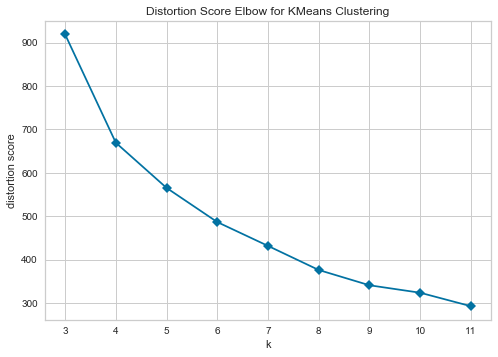

In [212]:
from yellowbrick.cluster import KElbowVisualizer
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(k_means, k=(3,12), timings=False)
visualizer.fit(feature)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

#### By Silhouette Score

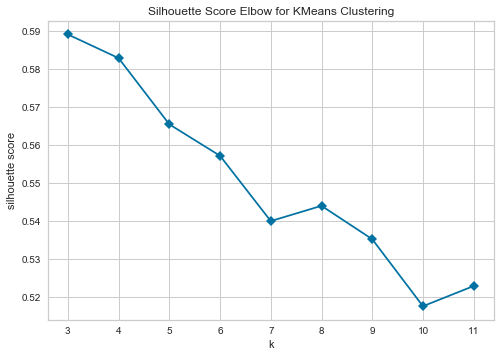

In [214]:
visualizer = KElbowVisualizer(k_means, k=(3,12), metric='silhouette',timings=False)
visualizer.fit(feature)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

#### By calinski_harabaz Score

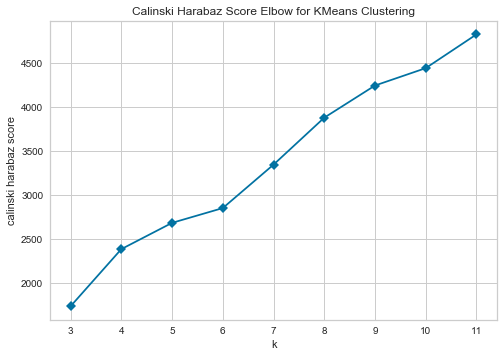

In [215]:
visualizer = KElbowVisualizer(k_means, k=(3,12), metric='calinski_harabaz',timings=False)
visualizer.fit(feature)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

So 3 is the best number of clusters

## Exploration of Clusters

Latitude and longitude of clusters will not be discussed since they are not meaningful.

In [230]:
result=venues_dummy.groupby('labels').mean()
result_to_drop=['Latitude','Longitude']
result.drop(result_to_drop, axis=1, inplace=True)
result=result.transpose().reset_index()
result.columns=['Venue Type','Cluster 1','Cluster 2','Cluster 3']
result

,Venue Type,Cluster 1,Cluster 2,Cluster 3
0,ATM,0.000000,0.000000,0.006289
1,Accessories Store,0.005495,0.000000,0.000000
2,African Restaurant,0.000000,0.000000,0.006289
3,American Restaurant,0.027473,0.030303,0.018868
4,Arcade,0.000000,0.007576,0.000000
5,Art Gallery,0.005495,0.000000,0.000000
6,Arts & Crafts Store,0.000000,0.000000,0.006289
7,Asian Restaurant,0.010989,0.000000,0.018868
8,Athletics & Sports,0.005495,0.000000,0.000000
9,Australian Restaurant,0.000000,0.000000,0.006289


In [236]:
#get the characteristics for Cluster 1
#select the top 5 Venue Type for Cluster 1
cluster1df=result[['Venue Type','Cluster 1']]
cluster1df=cluster1df.sort_values(by=['Cluster 1'], ascending=False)
cluster1df.head()

,Venue Type,Cluster 1
113,Seafood Restaurant,0.054945
112,Sandwich Place,0.043956
103,Pizza Place,0.043956
47,Fast Food Restaurant,0.038462
59,Grocery Store,0.038462


In [237]:
#get the characteristics for Cluster 2
#select the top 5 Venue Type for Cluster 2
cluster2df=result[['Venue Type','Cluster 2']]
cluster2df=cluster2df.sort_values(by=['Cluster 2'], ascending=False)
cluster2df.head()

,Venue Type,Cluster 2
47,Fast Food Restaurant,0.075758
102,Pharmacy,0.037879
59,Grocery Store,0.037879
3,American Restaurant,0.030303
51,Football Stadium,0.030303


In [238]:
#get the characteristics for Cluster 3
#select the top 5 Venue Type for Cluster 3
cluster3df=result[['Venue Type','Cluster 3']]
cluster3df=cluster3df.sort_values(by=['Cluster 3'], ascending=False)
cluster3df.head()

,Venue Type,Cluster 3
47,Fast Food Restaurant,0.062893
102,Pharmacy,0.031447
28,Chinese Restaurant,0.031447
59,Grocery Store,0.031447
137,Wings Joint,0.025157


So far, we can categorize the characteristics of three clusters.
- Cluster 1 permits are to be used primarily around restaurants and grocery store. The applicants would be restaurant owners or related stakeholders.
- Cluster 2 permits are to be used in a medium-sized local shopping center, or around sports training center, with resturants, grocery store, and pharmacy.
- Cluster 3 permits are to be used in a small local shopping center. The applicants might own Chinese restaurants, however cluster 2 permit applicants might be more interested in American restaurants.

## Recommendation and Discussion

In conclusion, considering the simliarity level and disimliarity level of top features of each cluster, the authoer believs that permit applicants wanted to operate, maintain, or renew business around local shopping center with restaurants, pharmacy, and grocery store nearby. Permit applicants had different interests, and local shopping centers are of different styles. However, the disimliarity is less clear than expected.

The reason might be:<br>
1) sampling error. Only 100 samples are used, and observations without correct latitude and longtitude are discarded.
<br>2) search query. Search limit and radius may have an influence.

To understand the business operation condition better, the PGC's government may need to document the applicant's business type and application purpose. With this information, applicant's interest and business operation situation can be interpreted in a deeper level.


## Conclusion

This report provides a description of new business operation for Prince George's County government. With data from personal and commercial permits issuance and Foursquare City Guide, the author used the K-Means clustering model to group the venues nearby the location of where the permit would be used. Business might be operated around different-style local shopping centers equipped with restaurants, pharmacy and grocery store.